In [1]:
import argparse
import cv2
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [2]:
def habitat(img, op_path, flag=1):
    '''
    This function will crop each habitat contours from arena image
    
    Param: img= arena image
           flag = 1 to crop each contour and save the image in new folder
    
    Returns: hab = habitat image with contours for non-empty cells present
             name_hab = list of habitat with their location
        
    '''
    row, col, ch = img.shape #read no. of rows,columns and channels
    rn = int(row/8) 
    cn = int(col - (col/8))

    hab = img[rn:cn,rn:cn] #crop the habitat from arena image 
    imgray = cv2.cvtColor(hab,cv2.COLOR_BGR2GRAY) #convert image to grayscale 
    ret,thresh = cv2.threshold(imgray,120,255,cv2.THRESH_BINARY) #make thresholding on gray image use BINARY method
    name_hab =[] #list for image location 
    
    #find contours using RETR_CCOMP and CHAIN_APPROX_SIMPLE
    contours1, hierarchy1 = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE) #find contours using thresh image
    
    for cnt in contours1:
        if 92000<cv2.contourArea(cnt)<93000:
            leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
            rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
            topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
            bottommost = tuple(cnt[cnt[:,:,1].argmax()][0]) #find leftmost,rightmost,topmost,bottommost points in contours
            new = hab[topmost[1]:bottommost[1],leftmost[0]:rightmost[0]] #crop the contour of each square present in habitat square
           
            ngray = cv2.cvtColor(new,cv2.COLOR_BGR2GRAY) #convert image to grayscale 
            ret,nth = cv2.threshold(ngray,250,255,cv2.THRESH_BINARY)
            newcnt, hierarchy2 = cv2.findContours(nth,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours present in each square  
            i=0
            j=0
            if len(newcnt)!=1:
                for cnt2 in newcnt:
                    if 64000<(cv2.contourArea(cnt2))<78000: #elimniate empty square  
                        
                        newcopy = new.copy()
                        x,y,w,h = cv2.boundingRect(cnt2)
                        new = cv2.rectangle(new,(x,y),(x+w,y+h),(0,0,255),2) #draw the bounding rectangel for the habitat
                        
                        crop = newcopy[y:y+h, x:x+w] #crop the contour
                        
                        M = cv2.moments(cnt)
                        if M['m00']!=0: #using moments fond the centre of each contour which satisfies above condition
                             
                             cx = int(M['m10']/M['m00']) #find x co-ordinate
                             cy = int(M['m01']/M['m00']) #find y co-ordinate
                             font = cv2.FONT_HERSHEY_SIMPLEX #use font HERSHEY_SIMPLEX
                             if 75<cx<415: #find the range where x co-ordinate present and assign value for j accordingly
                                 j=1
                             elif 416<cx<739:
                                 j=2
                             elif 740<cx<1033:
                                 j=3
                             elif 1034<cx<1351:
                                 j=4
                             elif 1352<cx<1625:
                                 j=5
                             
                             if 75<cy<430: #find the range where y co-ordinate present and assign value for i accordingly
                                 i=4
                             elif 431<cy<741:
                                 i=3
                             elif 742<cy<1065:
                                 i=2
                             elif 1066<cy<1377:
                                 i=1
                             elif 1378<cy<1625:
                                 i=0
                                 
                             txt =5*i+j #using these formula calculate location of contour present in image
                             name_hab.append(str(txt)) #append the loaction to list
                             
                             if flag==1: #to save cut contours
                                file1 =  os.path.join(op_path, (str(txt)+'.png'))#save image with location
                                cv2.imwrite(file1, crop) 
                                 
                             txt = str(txt)
                             cv2.putText(hab,txt,(cx-11,cy+5), font, 0.65,(0,0,255),2,cv2.LINE_AA) #put text in habitat image
                                
             
                
    return hab,name_hab


In [3]:
def animal(img, op_path, flag=1):
    '''
    This function will crop each non-empty cell for animal contours present in arena image
    
    Param: img= arena image
           flag = 1 to crop each contour and save the image in new folder
    
    Returns: ani = animal images with contours for non-empty cells present
             name_ani = list of animal with their location
        
    '''
    
    row, col, ch = img.shape #read no. of rows, cols. and channels
    rn = int(row/8)
    cn = int(col - (col/8))

    ani = img.copy() #make copy of arena image
    ani[rn:cn,rn:cn]=255 #remove the habitat sqaure from ani image

    imgray = cv2.cvtColor(ani,cv2.COLOR_BGR2GRAY) #convert image to grayscale 
    ret,thresh = cv2.threshold(imgray,120,255,cv2.THRESH_BINARY) #make thresholding on gray image use BINARY method
    
    name_ani=[]
    
    anit = thresh.copy()
    anit[rn:cn,rn:cn]=255 #crop the same copy of threshold ani image

    contours2, hierarchy2 = cv2.findContours(anit,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    #find contours using RETR_CCOMP and CHAIN_APPROX_SIMPLE

    
    for cnt in contours2:
        if 16000<cv2.contourArea(cnt)<17000:
            leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
            rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
            topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
            bottommost = tuple(cnt[cnt[:,:,1].argmax()][0]) #find leftmost,rightmost,topmost,bottommost points in contours
            new = ani[topmost[1]:bottommost[1],leftmost[0]:rightmost[0]] #crop the contour
           
            ngray = cv2.cvtColor(new,cv2.COLOR_BGR2GRAY) #convert image to grayscale 
            ret,nth = cv2.threshold(ngray,120,255,cv2.THRESH_BINARY)
            newcnt, hierarchy2 = cv2.findContours(nth,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            j='0'
            k='0'
            if len(newcnt): #eliminate the empty contours 
                            
                M = cv2.moments(cnt)
                cx = int(M['m10']/M['m00'])
                cy = int(M['m01']/M['m00']) # find centre using moments 
                font = cv2.FONT_HERSHEY_SIMPLEX
                
                if 73<cx<337: #find location of x co-ordiante and assign j value
                    j='A'
                elif 338<cx<801:
                    j='B'
                elif 802<cx<1117:
                    j='C'
                elif 1118<cx<1421:
                    j='D'
                elif 1422<cx<1729:
                    j='E'
                elif 1730<cx<2237:
                    j='F'
                
                if 73<cy<338: #find location of x co-ordiante and assign k value
                    k='6'
                elif 338<cy<801:
                    k='5'
                elif 802<cy<1117:
                    k='4'
                elif 1118<cy<1421:
                    k='3'
                elif 1422<cy<1729:
                    k='2'
                elif 1730<cy<2237:
                    k='1'
            
                txt = j+k 
                name_ani.append(txt) #append location of non-empty animal cell to list
                
                if flag==1: #save crop for each cut contour 
                    
                    cont_ani = ani[topmost[1]:bottommost[1],leftmost[0]:rightmost[0]]
                    file1 =  os.path.join(op_path, (txt +'.png'))#save image with location
                    cv2.imwrite(file1, cont_ani)
                cv2.putText(ani,txt,(cx-9,cy-78), font, 0.65,(0,0,255),2,cv2.LINE_AA) #put text of location
                cv2.drawContours(ani, [cnt], 0, (0,255,120), 2)
    
    return ani,name_ani #return animal image with all required contour and location

In [12]:
imgpath = "./image_5.png"
outputfolder_path =  "./output-5"

img = cv2.imread(imgpath)

if not os.path.isdir(outputfolder_path):
    os.mkdir(outputfolder_path)

hab, name_hab = habitat(img, outputfolder_path)
ani, name_ani = animal(img, outputfolder_path)
output = ani.copy() 
output[290:2030,290:2030]= hab

cv2.imwrite(os.path.join(outputfolder_path, 'output.png'),output)

True

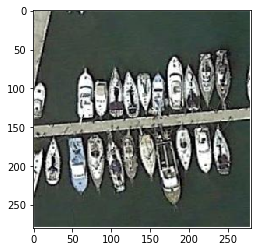

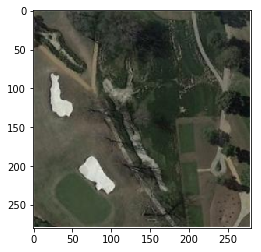

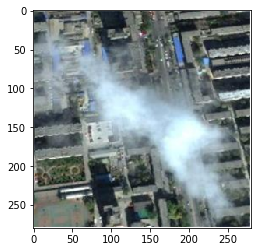

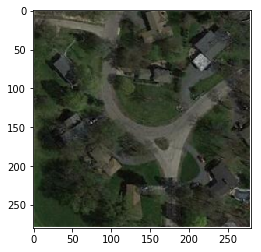

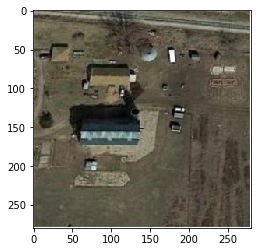

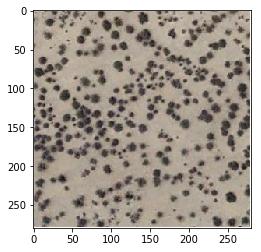

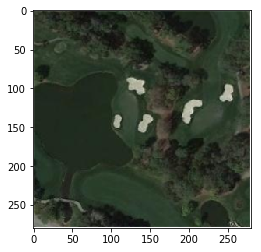

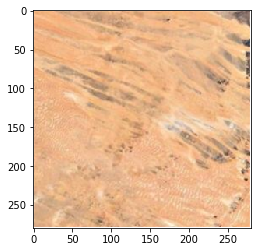

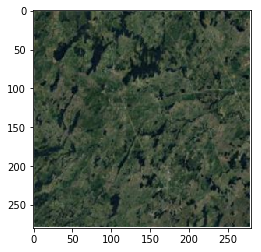

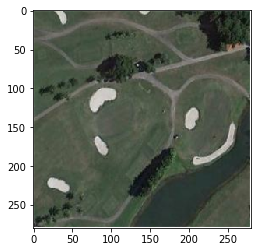

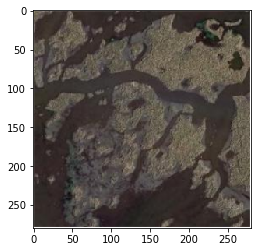

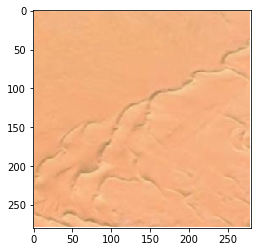

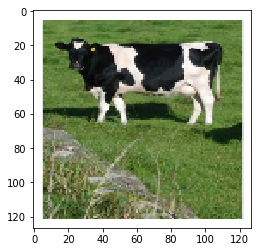

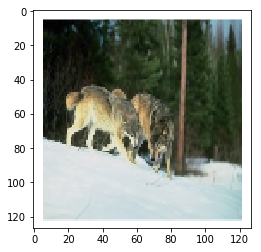

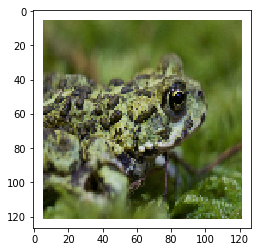

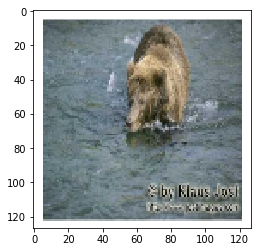

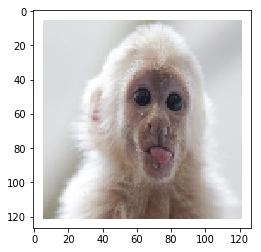

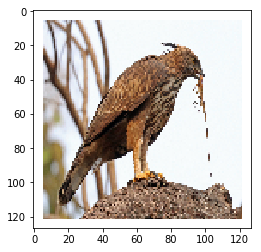

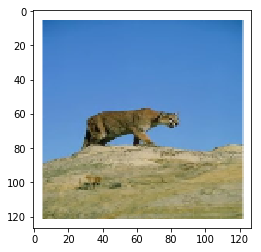

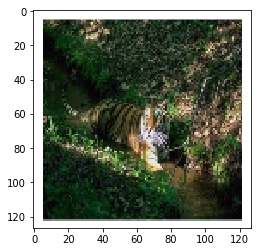

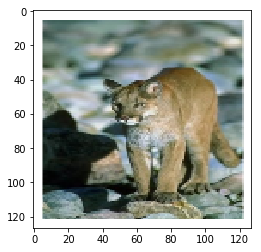

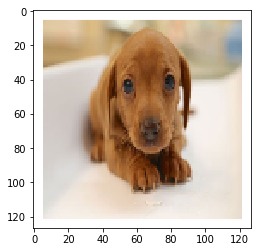

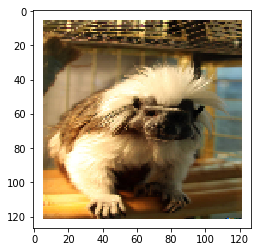

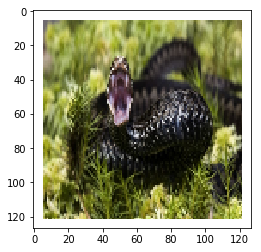

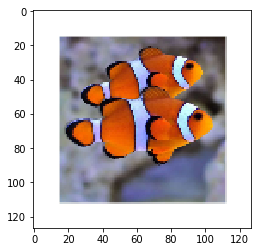

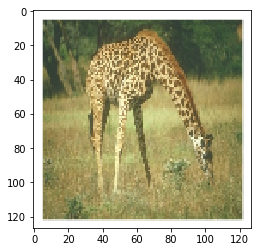

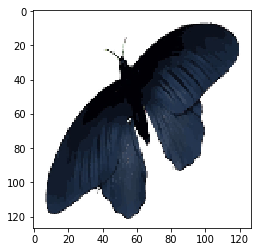

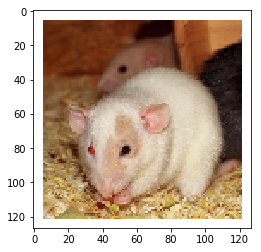

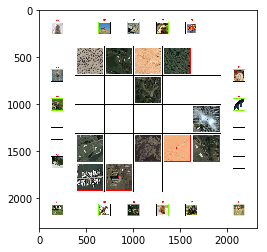

In [13]:
filelist = os.listdir(outputfolder_path)
for x in filelist:
    img = Image.open(os.path.join(outputfolder_path, x))
    plt.imshow(img)
    plt.show()